<a href="https://colab.research.google.com/github/IYB-Mata/CCADMACL_EXERCISES_COM232/blob/main/Exercise2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**



<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/IMF_advanced_economies_and_UN_least_developed_countries.svg/960px-IMF_advanced_economies_and_UN_least_developed_countries.svg.png"/>

## Dataset feature description

 - child mort - Death of children under 5 years of age per 1000 live births

- exports - Exports of goods and services per capita. Given as %age of the GDP per capita
- health - Total health spending per capita. Given as %age of GDP per capita
- import - Imports of goods and services per capita. Given as %age of the GDP per capita
- income - Net income per person
- inflation - The measurement of the annual growth rate of the Total GDP
- life_expec - The average number of years a new born child would live if the current mortality patterns are to remain the same
- total_fer - The number of children that would be born to each woman if the current age-fertility rates remain the same.
- gdpp - The GDP per capita. Calculated as the Total GDP divided by the total population.

In [62]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [97]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [65]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [66]:
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [67]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [68]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


In [69]:
df.isna().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [70]:
df_numericalCol = df.select_dtypes(include=['int64', 'float64'])
display(df_numericalCol.head())

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [75]:
df_numericalCol = pd.DataFrame()

df_numericalCol['Health'] = ((df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean()))

df_numericalCol['Trade'] = ((df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean()))

df_numericalCol['Finance'] = ((df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean()))

df_numericalCol.head()


,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [81]:
mms = MinMaxScaler()
ss = StandardScaler()

df_numericalCol['Health'] = mms.fit_transform(df_numericalCol[['Health']])
df_numericalCol['Trade'] = mms.fit_transform(df_numericalCol[['Trade']])
df_numericalCol['Finance'] = mms.fit_transform(df_numericalCol[['Finance']])
df_numericalCol.head()

,Health,Trade,Finance
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043


## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

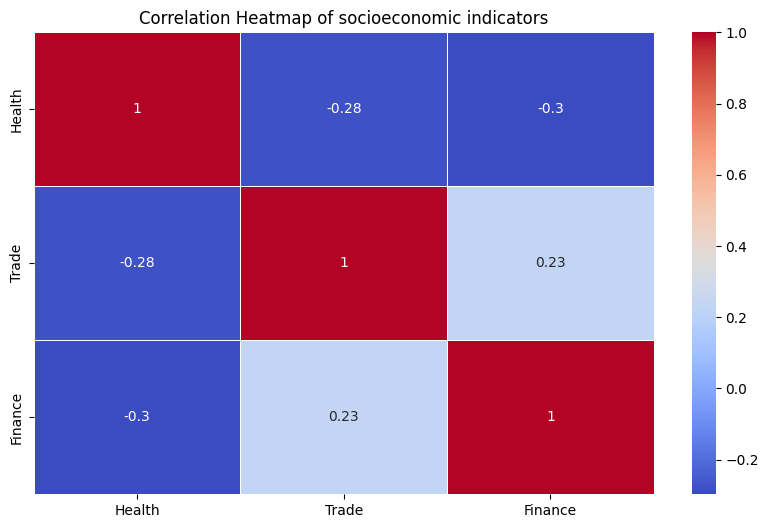

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numericalCol.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of socioeconomic indicators')
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

1. child mort and life expec has strong negative correlation (-0.89)
    -  high child mortility rate tends to have low life expectancy, this makes sense since with low income, and limited access to potable water and medical care will just increase child deaths or reduce lifespan.
2. child mort and total fer has strong positive correlation (0.85)
    - Strong inverse relationship between child mortality and total fertility. countries with high child mortality leads to higher fertility rate, and vice versa.
3. income and gdpp has strong positive correlation (0.9)
    - this indicates the country's economic development. wealthier countries generally have higher individual earnings.

NOTES:
Health: child mortality, health, life expectancy, total fer  = squeeze it all in to one

Trading: imports, exports = squeeze it all in to one

Finance: income flation gdpp = squeeze it all in to one



## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

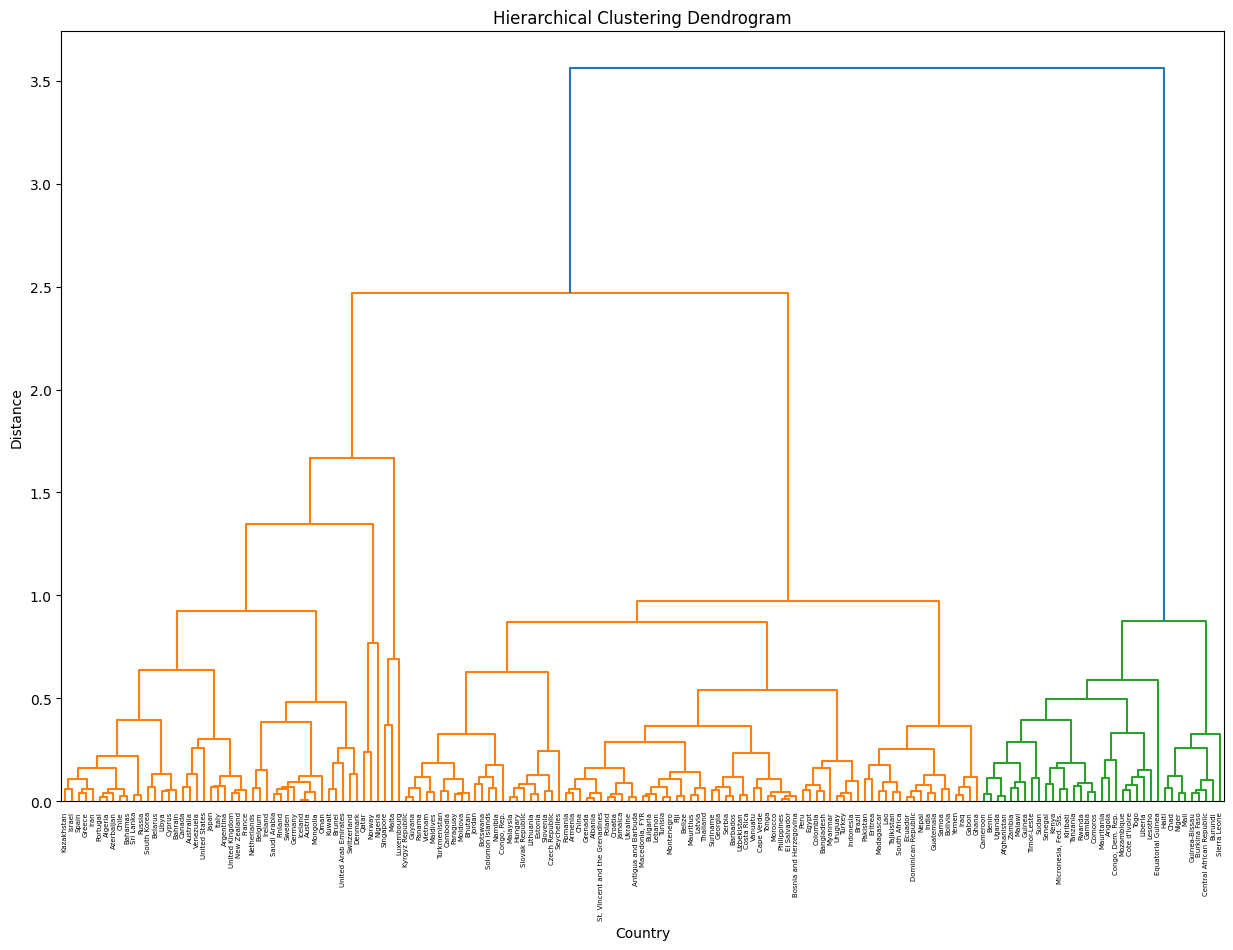

In [101]:
linked = linkage(df_numericalCol, method='ward')
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linked,
           orientation='top',
           labels=df['country'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.xlabel('Country')
plt.ylabel('Distance')
plt.show()

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

###3 Clusters, based on the diagram it naturally splits the cluster in three.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [91]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(df_numericalCol)

df['cluster'] = clusters
print(f"Cluster labels added to DataFrame. Number of clusters: {n_clusters}")
display(df.head(10))

Cluster labels added to DataFrame. Number of clusters: 3


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

In [93]:
X = df_numericalCol[['Health', 'Trade', 'Finance']]

In [100]:
cluster_Kmeans = KMeans(n_clusters=3)

model_kmeans = cluster_Kmeans.fit(X)

pred_kmeans = model_kmeans.labels_

print(pred_kmeans)


fig = px.scatter_3d(df_numericalCol, x='Health', y='Trade', z='Finance', color=pred_kmeans)
fig.show()


[2 0 0 2 0 0 0 1 1 0 0 1 0 0 0 1 0 2 0 0 0 0 0 1 0 2 2 0 2 1 0 2 2 0 0 0 2
 2 0 0 2 0 0 0 1 0 0 0 0 2 0 0 0 1 1 0 2 0 1 2 0 0 0 2 2 0 2 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 2 1 0 0 0 0 2 2 0 0 1 0 0 2 0 0 2 1 2 0 2 0 1 0 0 2 0 0 0 1
 0 2 1 1 1 2 0 0 0 0 0 0 1 0 0 2 0 1 2 0 0 2 1 0 0 0 0 0 0 0 0 2 0 1 1 0 2
 0 2 2 0 0 0 0 2 0 1 1 1 0 0 0 1 0 0 2]


Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

Blue Cluster: low finance, low health, and moderate trade. this indicates that the countries are developing through trading.

Yellow Cluster: Moderate finance, High Health, and moderate trade, this represents middle income or transitioning economies. these countries are balanced.

Pink Cluster: High finance, below average health, and moderate trade, this indicate countries are highly developed with sophisticated financial system.



## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


This clustering reveals that economic development follows a clear but challenging path. Many countries (the blue cluster) have successfully doing trade but remain stuck with poor healthcare and weak financial systems. This shows that trade alone isn’t enough for real development but I think its a good start.
The progression from blue to yellow to pink suggests countries must build multiple capacities simultaneously. The strong link between finance and health in advanced economies (pink cluster) indicates these dimensions reinforce each other good financial systems fund healthcare, while healthy populations drive economic productivity.
Most concerning is how many countries cluster in the high trade and low development group, suggesting structural barriers in the global economy that make it difficult to move beyond being lowcost exporters. True development requires more than just participating in global trade it demands building domestic institutions and investing in people.